In [1]:
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.insert(1, '../../python_scripts')
from fourier import *

# Test DFT and IDFT

We take a simple signal $f$ and we apply a Discrete Fourier Transform (**DFT**) to retrieve its frequencies. We then use the Inverse Discrete Fourier Transform (**IDFT**) to recompose the signal from its frequencies.

## The signal

In [2]:
# Arguments
P = 10 # period of the signal

freq = 1/P # The smallest frequency in the signal f
Freq = [freq*i for i in np.arange(0, 11)] # the list of frequencies that compose the signal

def f(t):
    s = 0
    for freq_i in Freq:
        s = s + 2*np.sin(2*np.pi*t*freq_i)
    return s

func = f

In [3]:
print("The frequencies that exist in the signal are: ")
print(Freq)

The frequencies that exist in the signal are: 
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


In [4]:
# Arguments
dt = .01 # dt : sample spacing 
N = 2500 # sample size (N/2 is the number the positive frequencies)

x, T = construct_discrete_signal_centered_at_0(dt, N, func)

In [5]:
2*dt*N

50.0

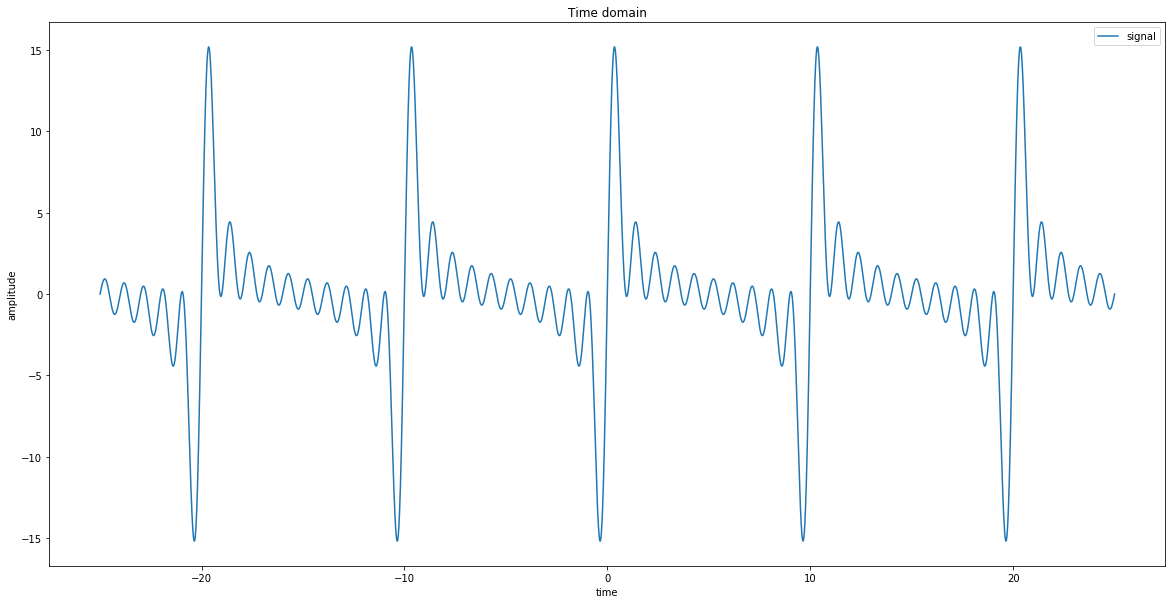

In [6]:
# Arguments
Xs = [T]
L = [x]
Labels = ["signal"]
title = "Time domain"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## DFT

We use the DFT to get the amplitudes associated to the frequencies.

In [7]:
X_noshift, Xi, X = retrieve_frequencies(x, N, dt)
X = X/(2*N)

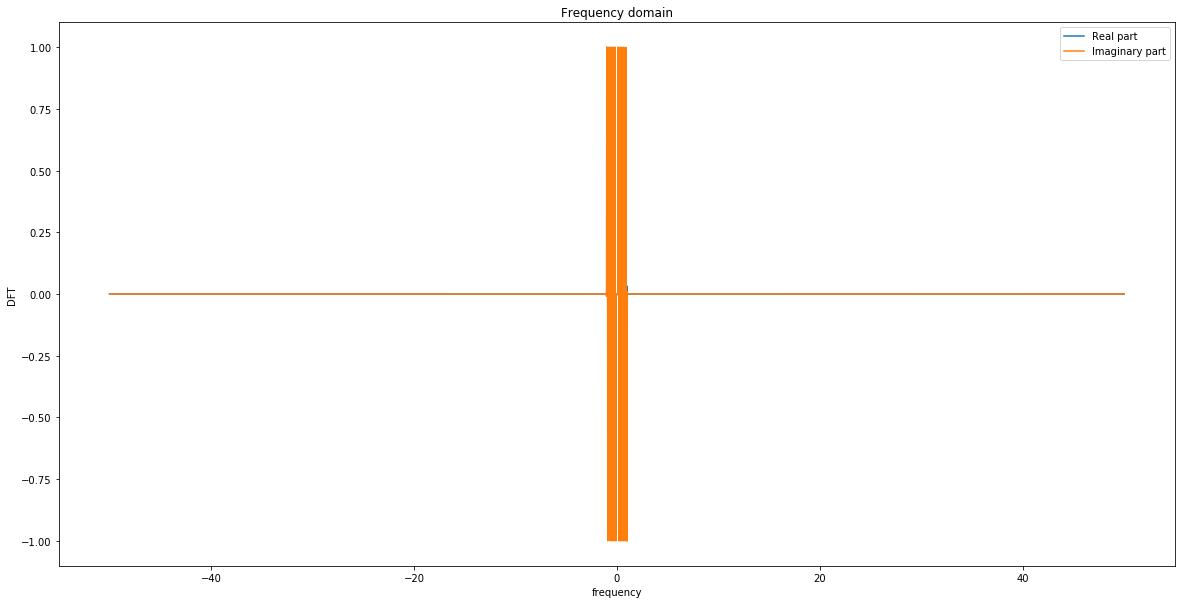

In [8]:
# Arguments
Xs = [Xi, Xi]
L = [np.real(X), np.imag(X)]
Labels = ["Real part", "Imaginary part"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

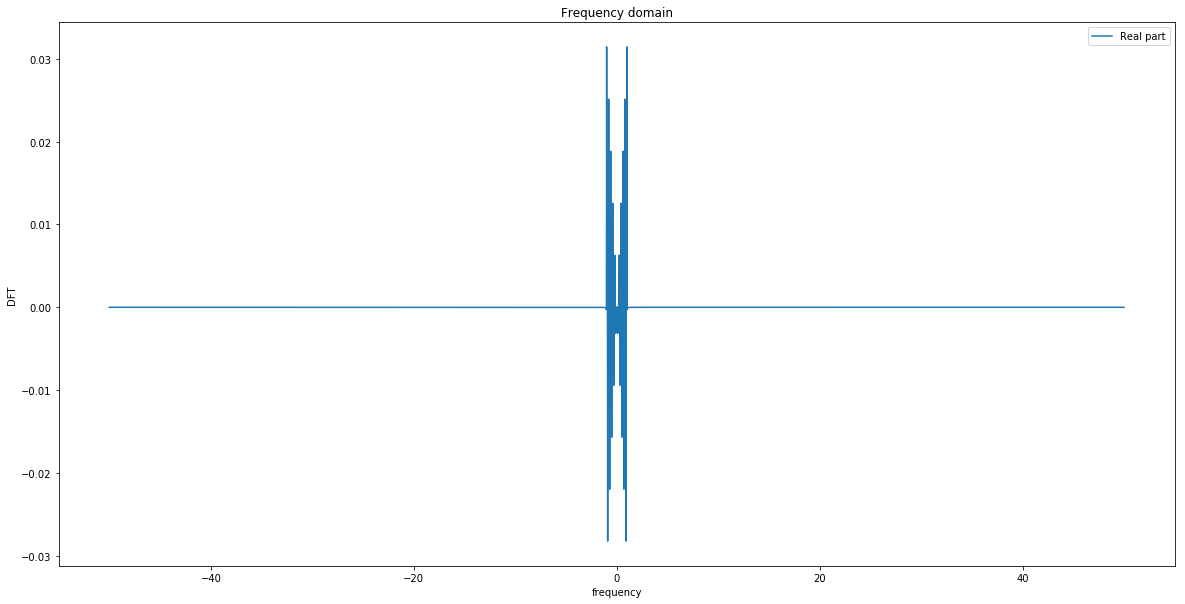

In [9]:
# Arguments
Xs = [Xi]
L = [np.real(X)]
Labels = ["Real part"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

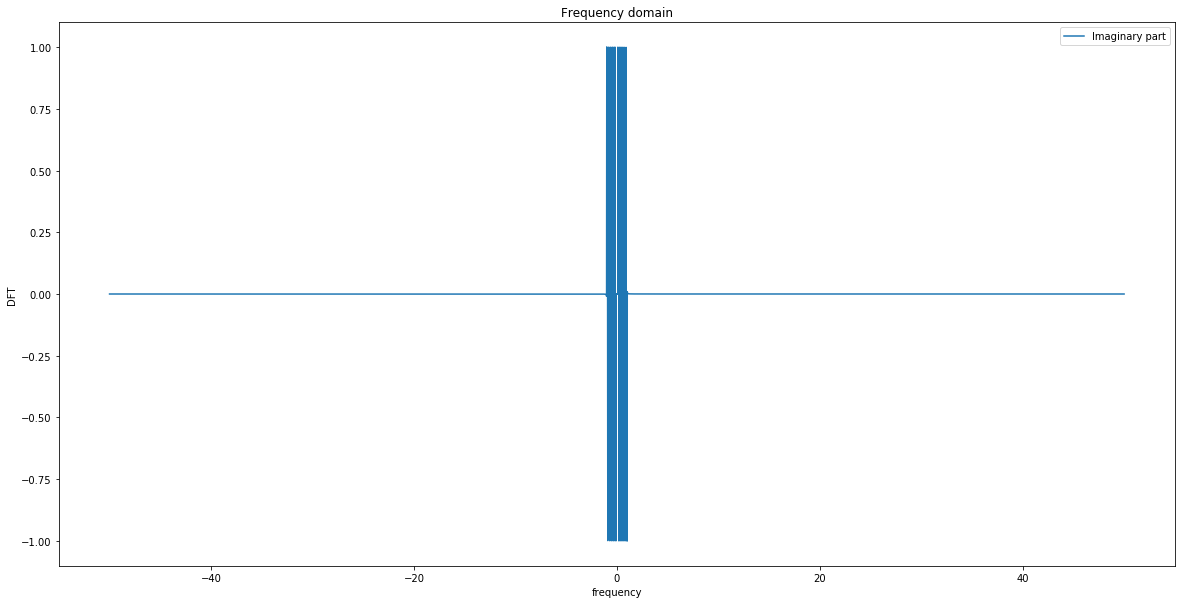

In [10]:
# Arguments
Xs = [Xi]
L = [np.imag(X)]
Labels = ["Imaginary part"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

In [11]:
X[N + 15]

(-0.009421735889735744+0.9996476268067004j)

In [12]:
X[N - 15]

(-0.009421735889735737-0.9996476268067004j)

In [13]:
Xi[N + 15]

0.3

In [14]:
Xi[N - 15]

-0.3

In [15]:
A, B = extract_an_bn(X, N)
Xi_half = Xi[N:]

/usr/lib/python3/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


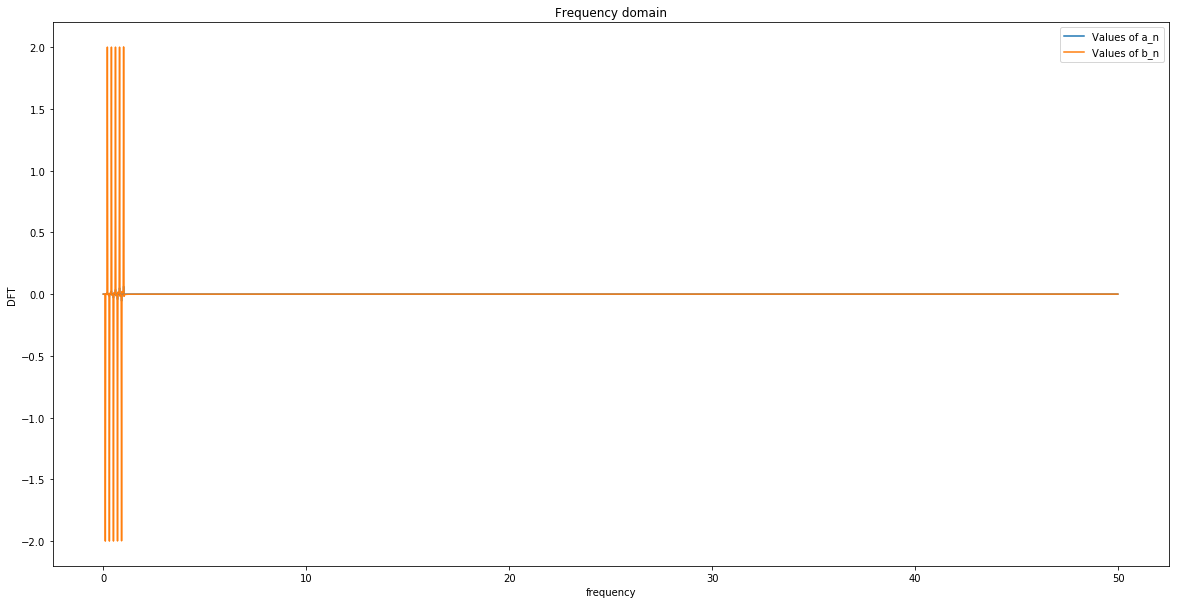

In [16]:
# Arguments
Xs = [Xi_half, Xi_half]
L = [A, B]
Labels = ["Values of a_n", "Values of b_n"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## IDFT

From the amplitudes/values of the DFT we can recover the signal using the IDFT.

In [17]:
recovered_x = np.fft.ifft(X_noshift) # IDFT
error = np.abs(recovered_x.real - x) # we also compute the error between the original signal and the one returned by the IDFT

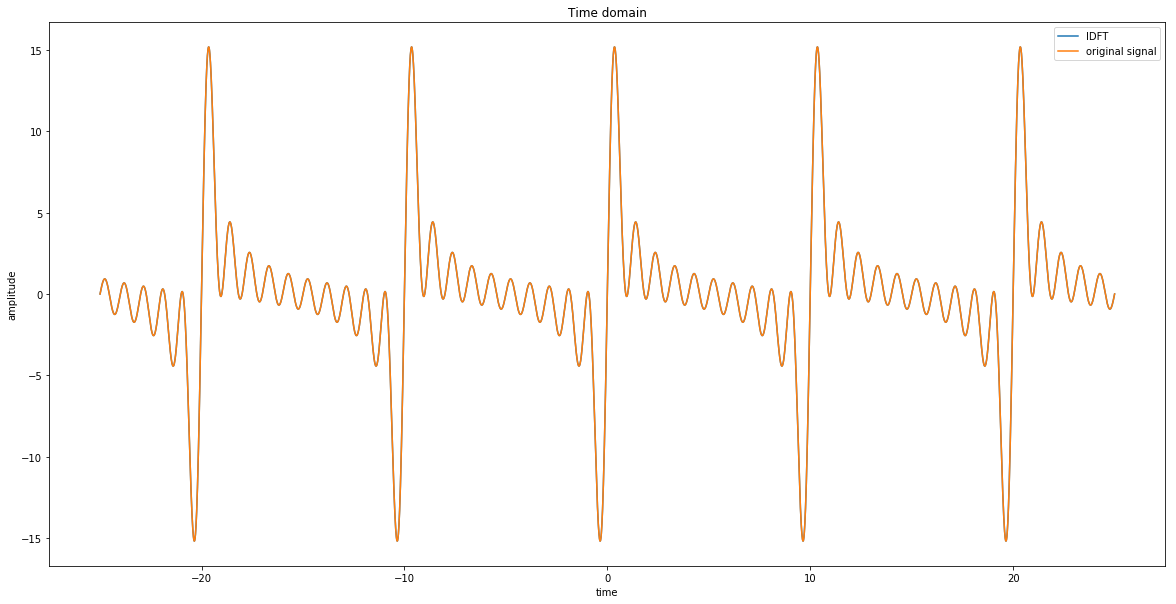

In [18]:
# Arguments
Xs = [T, T]
L = [recovered_x.real, x]
Labels = ["IDFT", "original signal"]
title = "Time domain"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

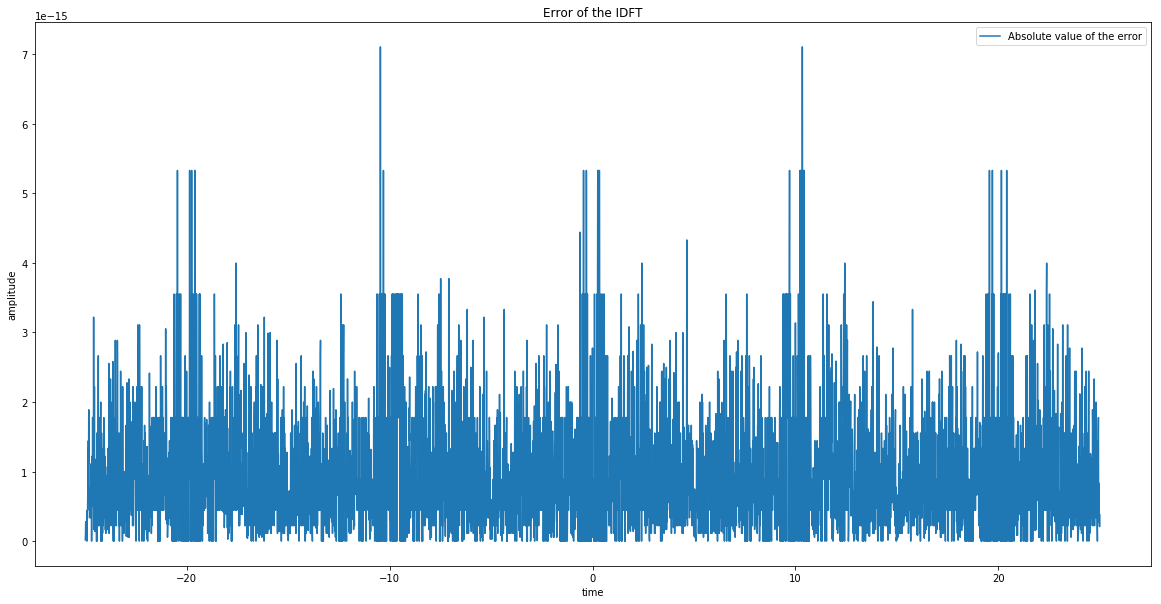

Maximum value of the error :  7.105427357601002e-15


In [19]:
# Arguments
Xs = [T]
L = [error]
Labels = ["Absolute value of the error"]
title = "Error of the IDFT"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)
print("Maximum value of the error : ", np.amax(error))